# K~S test
检验两个分布是否为同一分布

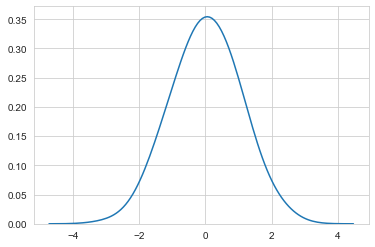

In [5]:
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt

#generate a gaussian r.v X
x = stats.norm.rvs(size=1000);
sns.set_style('whitegrid')
sns.kdeplot(np.array(x), bw=0.5)
plt.show()




In [6]:
stats.kstest(x, 'norm')

KstestResult(statistic=0.02237505749737534, pvalue=0.6899164365131856)

statistic就指的是D的测试统计量

p_value小于0.05 则拒绝零假设

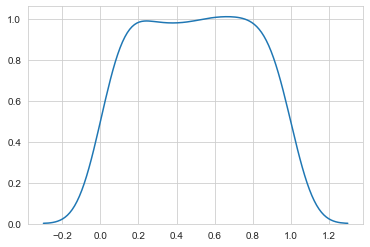

In [7]:
# Y ~ Continous Uniform Distribution(0,1)
y = np.random.uniform(0,1,10000);
sns.kdeplot(np.array(y), bw=0.1)
plt.show()

In [8]:
stats.kstest(y, 'norm')

KstestResult(statistic=0.5002524534042818, pvalue=0.0)

# uniform distribution test

In [9]:
import random
print(random.random())

0.15014753583490126


In [13]:
#load IRIS dataset with 150 points.
from sklearn import datasets
iris = datasets.load_iris()
d = iris.data
print(d[0:5,:])
print(d[2,:])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
[4.7 3.2 1.3 0.2]


- 首先计算出随机抽样的样本比列 p
- 循环每一条样本
- 然后利用均匀分布随机产生0到1的一个概率值a
- 如果随机的概率值a小于等于 p 则抽取此条样本

In [20]:
# Sample 30 points randomly from the 150 point dataset
n=150
m=30
p = m/n
print(p)
print("*"*100)
sampled_data =[];

for i in range(0,n):
  a = random.random()
#   print(a)
  if  a <= p:
    sampled_data.append(d[i,:])
    
print(sampled_data)
print("*"*100)
print(len(sampled_data))

0.2
****************************************************************************************************
[array([5. , 3.4, 1.5, 0.2]), array([5.1, 3.5, 1.4, 0.3]), array([5.4, 3.4, 1.7, 0.2]), array([5.1, 3.7, 1.5, 0.4]), array([4.8, 3.4, 1.9, 0.2]), array([4.8, 3.1, 1.6, 0.2]), array([5.2, 2.7, 3.9, 1.4]), array([6.7, 3. , 5. , 1.7]), array([5.5, 2.4, 3.8, 1.1]), array([5.8, 2.7, 3.9, 1.2]), array([5.5, 2.6, 4.4, 1.2]), array([6.4, 2.7, 5.3, 1.9]), array([5.8, 2.8, 5.1, 2.4]), array([7.7, 2.6, 6.9, 2.3]), array([5.6, 2.8, 4.9, 2. ]), array([6.7, 3.3, 5.7, 2.1]), array([7.4, 2.8, 6.1, 1.9]), array([5.8, 2.7, 5.1, 1.9]), array([6.7, 3.3, 5.7, 2.5])]
****************************************************************************************************
19


# 降维处理
## 手写PCA降维

In [11]:
import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [16]:
os.getcwd()

'D:\\jupyter\\notebook\\自写函数\\Core_File\\Data science note'

In [15]:
os.chdir(".\Data science note")

In [19]:
d0 = pd.read_csv('mnist_train.csv')

print(d0.head(5))
l = d0['label']
d = d0.drop("label",axis=1)

   label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   

   pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783  
0         0         0         

In [18]:
print(d.shape)
print(l.shape)

(42000, 784)
(42000,)


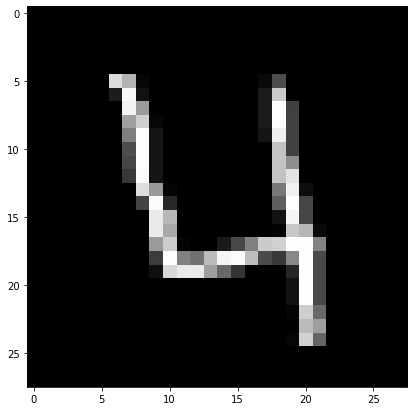

4


In [21]:
# display or plot a number.
plt.figure(figsize=(7,7))
idx = 3

grid_data = d.iloc[idx].to_numpy().reshape(28,28)  # reshape from 1d to 2d pixel array
plt.imshow(grid_data, interpolation = "none", cmap = "gray")
plt.show()

print(l[idx])

In [23]:
# Pick first 15K data-points to work on for time-effeciency.
#Excercise: Perform the same analysis on all of 42K data-points.

labels = l.head(15000)
data = d.head(15000)

print("the shape of sample data = ", data.shape)

the shape of sample data =  (15000, 784)


In [24]:
# Data-preprocessing: Standardizing the data
# 均值为0，标准差为1 
from sklearn.preprocessing import StandardScaler
standardized_data = StandardScaler().fit_transform(data)
print(standardized_data.shape)

(15000, 784)


In [58]:
#find the co-variance matrix which is : A^T * A
sample_data = standardized_data

# matrix multiplication using numpy  矩阵相乘
covar_matrix = np.matmul(sample_data.T , sample_data) 

# 方差矩阵 按道理应该还需要除以N,样本量 15000，但是因为是常数所有在此影响不大 

print ( "The shape of variance matrix = ", covar_matrix.shape)


The shape of variance matrix =  (784, 784)


In [71]:
# finding the top two eigen-values and corresponding eigen-vectors 
# 发现最大的两个特征值与相关联的特征向量
# for projecting onto a 2-Dim space.

from scipy.linalg import eigh 

# 由于函数eigh计算出的特征值是按照低到高排列（升序），
# 而总共有784个特征，向量索引
values, vectors = eigh(covar_matrix, eigvals=(782,783))

print("Shape of eigen vectors = ",vectors.shape)
# converting the eigen vectors into (2,d) shape for easyness of further computations
vectors = vectors.T
print("Updated shape of eigen vectors = ",vectors.shape)
# here the vectors[1] represent the eigen vector corresponding 1st principal eigen vector
# here the vectors[0] represent the eigen vector corresponding 2nd principal eigen vector

Shape of eigen vectors =  (784, 2)
Updated shape of eigen vectors =  (2, 784)


In [85]:
# projecting the original data sample on the plane 
#formed by two principal eigen vectors by vector-vector multiplication.
# 根据特征向量 2维 映射 原始向量 d维
import matplotlib.pyplot as plt
new_coordinates = np.matmul(vectors, sample_data.T)

print (" resultanat new data points' shape ", vectors.shape, "X", sample_data.T.shape," = ", new_coordinates.shape)

 resultanat new data points' shape  (2, 784) X (784, 15000)  =  (2, 15000)


In [86]:
import pandas as pd

# appending label to the 2d projected data
# 合并标签与生成数据框
new_coordinates = np.vstack((new_coordinates, labels)).T

# creating a new data frame for ploting the labeled points.
dataframe = pd.DataFrame(data=new_coordinates, columns=("1st_principal", "2nd_principal", "label"))
print(dataframe.head())

   1st_principal  2nd_principal  label
0      -5.558661      -5.043558    1.0
1       6.193635      19.305278    0.0
2      -1.909878      -7.678775    1.0
3       5.525748      -0.464845    4.0
4       6.366527      26.644289    0.0


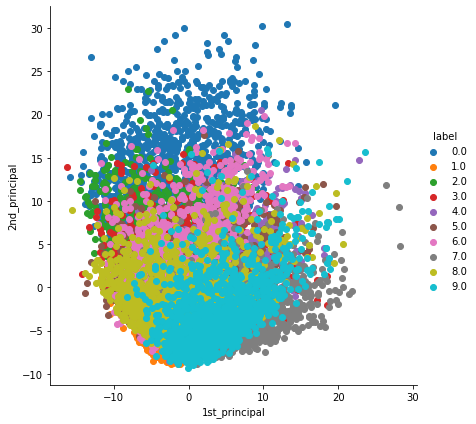

In [95]:
# ploting the 2d data points with seaborn
# 参数size指的是画布大小
import seaborn as sn
sn.FacetGrid(dataframe, hue="label", size=6).map(plt.scatter, '1st_principal', '2nd_principal').add_legend()
plt.show()

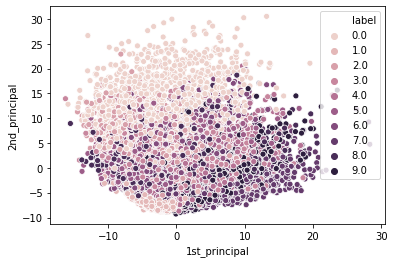

In [99]:
# 参数legend值得是显示所有的标签，
sn.scatterplot(x="1st_principal",y="2nd_principal",legend="full",hue="label",data=dataframe)

## PCA using Scikit-Learn

In [106]:
# initializing the pca
# 初始化主成分分析
from sklearn import decomposition
pca = decomposition.PCA()

In [107]:
# configuring the parameteres
# the number of components = 2
pca.n_components = 2
pca_data = pca.fit_transform(sample_data)

# pca_reduced will contain the 2-d projects of simple data
print("shape of pca_reduced.shape = ", pca_data.shape)

shape of pca_reduced.shape =  (15000, 2)


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


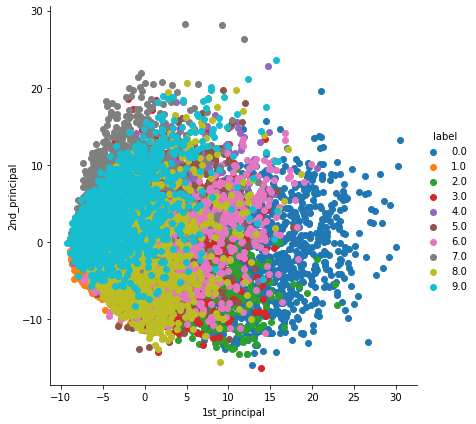

In [103]:
# attaching the label for each 2-d data point 
pca_data = np.vstack((pca_data.T, labels)).T

# creating a new data fram which help us in ploting the result data
pca_df = pd.DataFrame(data=pca_data, columns=("1st_principal", "2nd_principal", "label"))
sn.FacetGrid(pca_df, hue="label", size=6).map(plt.scatter, '1st_principal', '2nd_principal').add_legend()
plt.show()

## PCA所有特征信息解释图

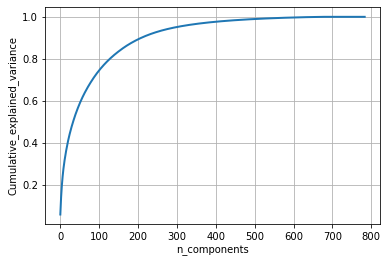

In [119]:
# PCA for dimensionality redcution (non-visualization)
# 用于降维的PCA(不是为了可视化) 
pca.n_components = 784
pca_data = pca.fit_transform(sample_data)

# 从大到小排序（降序）特征值的占比，代表信息的解释量
percentage_var_explained = pca.explained_variance_ / np.sum(pca.explained_variance_);
# 累计信息量
cum_var_explained = np.cumsum(percentage_var_explained)

# Plot the PCA spectrum
plt.figure(1, figsize=(6, 4))

plt.clf()
plt.plot(cum_var_explained, linewidth=2)
plt.axis('tight')
plt.grid()
plt.xlabel('n_components')
plt.ylabel('Cumulative_explained_variance')
plt.show()


## t-SNE using Scikit-Learn
https://distill.pub/2016/misread-tsne/

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


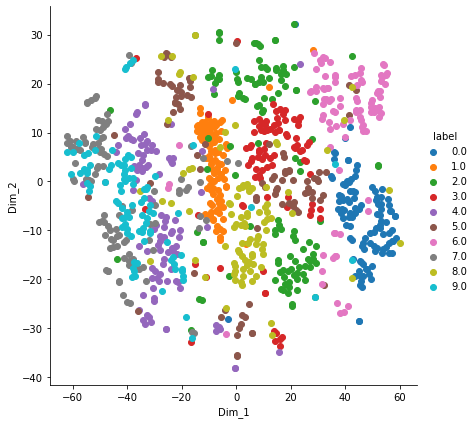

In [128]:
from sklearn.manifold import TSNE

# Picking the top 1000 points as TSNE takes a lot of time for 15K points
# 当然如果利用所有的样本量，同事进行参数调优，很有可能训练出
# http://colah.github.io/posts/2014-10-Visualizing-MNIST/ 这样的2维结果
# 在此由于测试测试时间原因，取1000的样本量进行测试
data_1000 = standardized_data[0:1000,:]
labels_1000 = labels[0:1000]


model = TSNE(n_components=2, random_state=0)
# configuring the parameteres
# the number of components = 2  所要嵌入空间的维度，也就是最终降维的维度
# default perplexity = 30       困惑度，也就是在嵌入过程种，保证每个点最近30个点的距离
# default learning rate = 200   拟合速度
# default Maximum number of iterations for the optimization = 1000 迭代次数，每次优化上次嵌入结果

tsne_data = model.fit_transform(data_1000)


# creating a new data frame which help us in ploting the result data
tsne_data = np.vstack((tsne_data.T, labels_1000)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))

# Ploting the result of tsne
sn.FacetGrid(tsne_df, hue="label", size=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


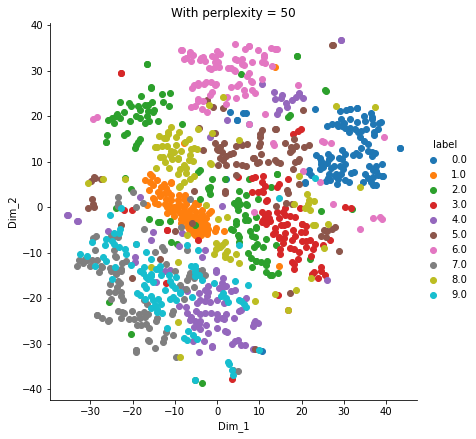

In [129]:
model = TSNE(n_components=2, random_state=0, perplexity=50)
tsne_data = model.fit_transform(data_1000) 

# creating a new data fram which help us in ploting the result data
tsne_data = np.vstack((tsne_data.T, labels_1000)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))

# Ploting the result of tsne
sn.FacetGrid(tsne_df, hue="label", size=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.title('With perplexity = 50')
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


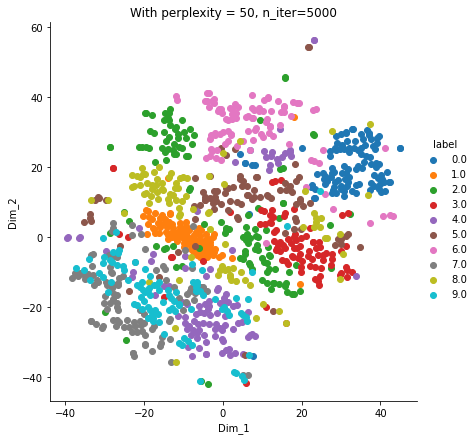

In [130]:
model = TSNE(n_components=2, random_state=0, perplexity=50,  n_iter=5000)
tsne_data = model.fit_transform(data_1000) 

# creating a new data fram which help us in ploting the result data
tsne_data = np.vstack((tsne_data.T, labels_1000)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))

# Ploting the result of tsne
sn.FacetGrid(tsne_df, hue="label", size=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.title('With perplexity = 50, n_iter=5000')
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


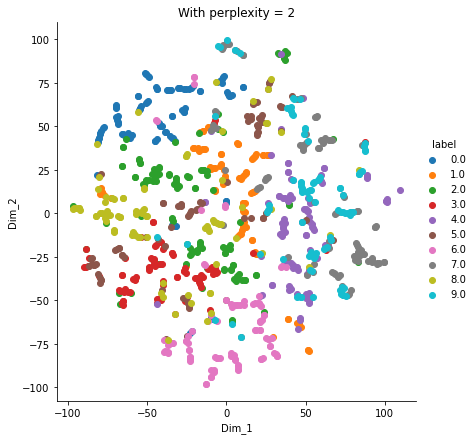

In [131]:
model = TSNE(n_components=2, random_state=0, perplexity=2)
tsne_data = model.fit_transform(data_1000) 

# creating a new data fram which help us in ploting the result data
tsne_data = np.vstack((tsne_data.T, labels_1000)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))

# Ploting the result of tsne
sn.FacetGrid(tsne_df, hue="label", size=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.title('With perplexity = 2')
plt.show()